In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [46]:
data={
    "Текст":[
        "Купите дешевый товар сейчас",
        "Ваш заказ подтвержден",
        "Поздравляем, вы выиграли приз",
        "Ваш отчёт готов",
        "Нажмите, чтобы получить бонус"
    ],
    "Спам":[1,0,1,0,1]
}
df=pd.DataFrame(data)
df

,Текст,Спам
0,Купите дешевый товар сейчас,1
1,Ваш заказ подтвержден,0
2,"Поздравляем, вы выиграли приз",1
3,Ваш отчёт готов,0
4,"Нажмите, чтобы получить бонус",1


In [47]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df["Текст"])
y=df["Спам"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Точность модели:{accuracy:2f}")

Точность модели:0.500000


In [49]:
new_mail=["Срочно получите подарок"]
X_new_mail=vectorizer.transform(new_mail)
result=model.predict(X_new_mail)
print("Спам" if result[0]==1 else "Не спам") 

Спам


In [50]:
words=vectorizer.get_feature_names_out()
coefficients=model.coef_[0]
coefficients

array([ 0.        , -0.38314332,  0.19140402,  0.19140402, -0.38314332,
        0.19140402,  0.        ,  0.19140402,  0.        , -0.38314332,
        0.        ,  0.19140402,  0.        ,  0.19140402,  0.19140402,
        0.19140402,  0.        ])

In [51]:
sorted_indices=coefficients.argsort()[::-1]
sorted_words=[words[i] for i in sorted_indices]
sorted_coeffs=coefficients[sorted_indices]

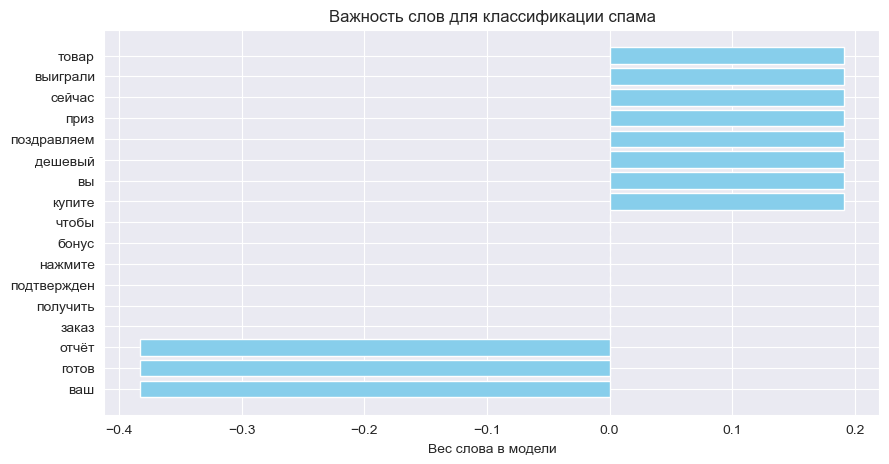

In [52]:
plt.figure(figsize=(10,5))
plt.barh(sorted_words,sorted_coeffs,color='skyblue')
plt.xlabel("Вес слова в модели")
plt.title("Важность слов для классификации спама")
plt.gca().invert_yaxis()
plt.show()

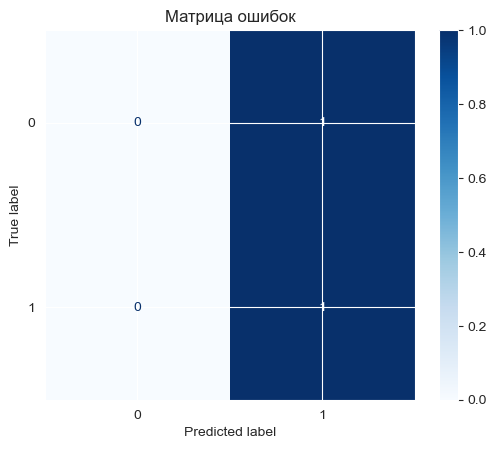

In [53]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap="Blues")
plt.title("Матрица ошибок")
plt.show()